In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pickle

In [2]:
# Load and preprocess data
train = pd.read_csv("Historical_Data_7_Aug_2024.csv")
train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month

In [3]:
# One-hot encode categorical variables
train_data = train.copy()
train_data = pd.get_dummies(train_data, columns=['Disease', 'Season', 'Medicine'])
train_data = train_data.drop(['Patient Name', 'Date', 'Variety'], axis=1)

# Prepare features and labels
X = train_data.drop(['Quantity(Packets)'], axis=1)
y = train_data['Quantity(Packets)']

In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [5]:
# Make predictions and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 6.252683738378687


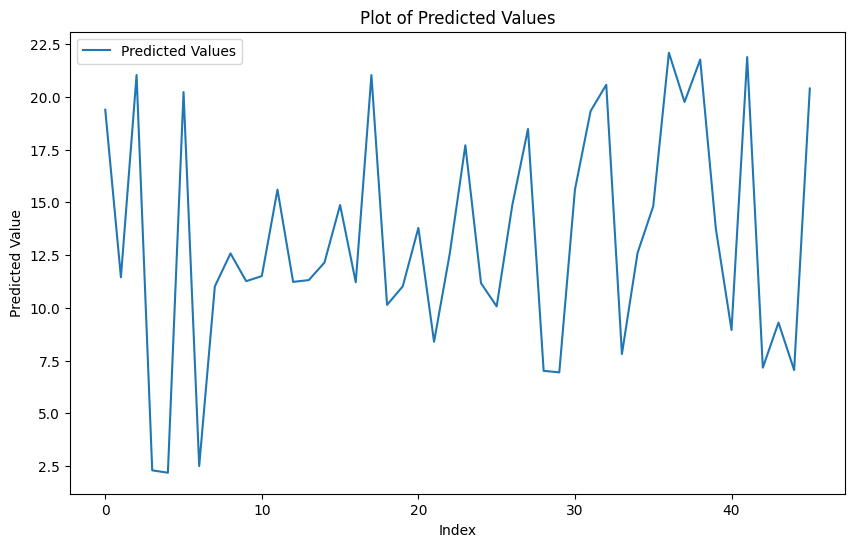

In [6]:
# Plot predicted values
plt.figure(figsize=(10, 6))
plt.plot(predictions, label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Predicted Value')
plt.title('Plot of Predicted Values')
plt.legend()
plt.show()

In [7]:
# Save and load model
with open("model_saved.pkl", "wb") as file:
    pickle.dump(model, file)

with open("model_saved.pkl", "rb") as file:
    model_loaded = pickle.load(file)

In [8]:
# Verify loaded model predictions
loaded_predictions = model_loaded.predict(X_test)
print("Loaded Model Predictions:", loaded_predictions)

Loaded Model Predictions: [19.393      11.45       21.04133333  2.29333333  2.18083333 20.23266667
  2.49583333 11.01666667 12.58       11.26333333 11.505      15.60333333
 11.23       11.31416667 12.145      14.87533333 11.214      21.03733333
 10.13933333 11.01666667 13.79        8.39033333 12.5505     17.70683333
 11.17       10.06716667 14.87533333 18.47878571  7.01252381  6.93919048
 15.61       19.32833333 20.57833333  7.80828571 12.605      14.818
 22.096      19.7597619  21.772      13.74        8.95       21.89
  7.162       9.3         7.04795238 20.4       ]
